In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [161]:
train = pd.read_csv("train_v9rqX0R.csv")
test = pd.read_csv("test_AbJTz2l.csv")

## Understanding the data and EDA

In [162]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [163]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [164]:
train.isna().sum() #checking for null values in train dataset

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [165]:
test.isna().sum() #checking for null values in test dataset

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [166]:
train.columns #columns in train dataset

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [167]:
test.columns #columns in test dataset

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [168]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True) # creating a new dataset 'data' by concatinating test & train

In [169]:
train.shape

(8523, 13)

In [170]:
test.shape

(5681, 12)

In [171]:
data.shape

(14204, 13)

In [172]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [173]:
data.isna().sum() # Before Missing value handling

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [174]:
data.dtypes # Checking the datatypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

### Missing Value handling

In [175]:
d3 = data[["Item_Outlet_Sales","Item_Weight"]]

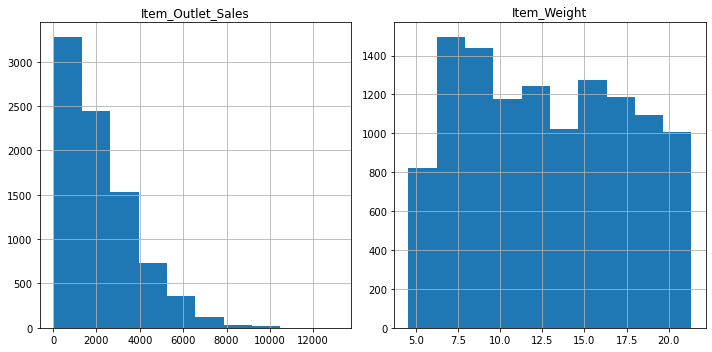

In [176]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
d3.hist()
plt.show()

In [177]:
data.Item_Outlet_Sales = data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())

In [178]:
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())

In [179]:
data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [180]:
data.Outlet_Size = data.Outlet_Size.fillna('Medium')

In [181]:
data.isna().sum() # After missing value handling

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [183]:
data['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [184]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

## Encoding

In [185]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [186]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [187]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,0,...,0,1,0,0,0,0,0,0,0,0


## Cleaned Dataset

In [188]:
import warnings
warnings.filterwarnings('ignore')
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

## Model Selection

In [189]:
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [190]:
train2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [191]:
test2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDW58,20.750000,0.007565,107.8622,OUT049,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.300000,0.038428,87.3198,OUT017,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,14.600000,0.099575,241.7538,OUT010,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,FDQ58,7.315000,0.015388,155.0340,OUT017,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,FDY38,12.792854,0.118599,234.2300,OUT027,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [192]:
train.isna().sum()

Item_Identifier           0
Item_Weight               0
Item_Visibility           0
Item_MRP                  0
Outlet_Identifier         0
Item_Outlet_Sales         0
Item_Fat_Content_0        0
Item_Fat_Content_1        0
Item_Fat_Content_2        0
Item_Fat_Content_3        0
Item_Fat_Content_4        0
Outlet_Location_Type_0    0
Outlet_Location_Type_1    0
Outlet_Location_Type_2    0
Outlet_Size_0             0
Outlet_Size_1             0
Outlet_Size_2             0
Outlet_Type_0             0
Outlet_Type_1             0
Outlet_Type_2             0
Outlet_Type_3             0
Item_Type_Combined_0      0
Item_Type_Combined_1      0
Item_Type_Combined_2      0
Outlet_0                  0
Outlet_1                  0
Outlet_2                  0
Outlet_3                  0
Outlet_4                  0
Outlet_5                  0
Outlet_6                  0
Outlet_7                  0
Outlet_8                  0
Outlet_9                  0
dtype: int64

In [193]:
test.isna().sum()

Item_Identifier           0
Item_Weight               0
Item_Visibility           0
Item_MRP                  0
Outlet_Identifier         0
Item_Fat_Content_0        0
Item_Fat_Content_1        0
Item_Fat_Content_2        0
Item_Fat_Content_3        0
Item_Fat_Content_4        0
Outlet_Location_Type_0    0
Outlet_Location_Type_1    0
Outlet_Location_Type_2    0
Outlet_Size_0             0
Outlet_Size_1             0
Outlet_Size_2             0
Outlet_Type_0             0
Outlet_Type_1             0
Outlet_Type_2             0
Outlet_Type_3             0
Item_Type_Combined_0      0
Item_Type_Combined_1      0
Item_Type_Combined_2      0
Outlet_0                  0
Outlet_1                  0
Outlet_2                  0
Outlet_3                  0
Outlet_4                  0
Outlet_5                  0
Outlet_6                  0
Outlet_7                  0
Outlet_8                  0
Outlet_9                  0
dtype: int64

In [194]:
X_train = train2.drop(['Item_Outlet_Sales', 'Outlet_Identifier','Item_Identifier'], axis=1)
y_train = train2.Item_Outlet_Sales

In [195]:
X_test = test2.drop(['Outlet_Identifier','Item_Identifier'], axis=1)

In [196]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score



### Random Forest Model

In [197]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [198]:
y_predra = regressor.predict(X_test)

In [199]:
rf_accuracy = round(regressor.score(X_train,y_train),2)
rf_accuracy

0.94

In [200]:
r2_score(y_train, regressor.predict(X_train))

0.9394789888473624

In [201]:
submission = pd.DataFrame({
'Item_Identifier':test2['Item_Identifier'],
'Outlet_Identifier':test2['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [202]:
submission.to_csv('submission1.csv',index=False)

### Linear Regression

In [203]:
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [204]:
y_pred = regressor.predict(X_test)

In [205]:
lr_accuracy = round(regressor.score(X_train,y_train) * 100,2)
lr_accuracy

56.36

In [206]:
r2_score(y_train, regressor.predict(X_train))

0.563589277727048

In [207]:
submission = pd.DataFrame({
'Item_Identifier':test2['Item_Identifier'],
'Outlet_Identifier':test2['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [208]:
submission.to_csv('submission2.csv',index=False)

### Decision Tree

In [209]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [210]:
y_pred = regressor.predict(X_test)

In [211]:
tree_accuracy = round(regressor.score(X_train,y_train),2)
tree_accuracy

1.0

In [212]:
r2_score(y_train, regressor.predict(X_train))

1.0

In [213]:
submission = pd.DataFrame({
'Item_Identifier':test2['Item_Identifier'],
'Outlet_Identifier':test2['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [214]:
submission.to_csv('submission3.csv',index=False)